# ARUBA - PRE-PROCESSAMENTO 01

In [1]:
##importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
!pip install -q -U watermark
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13
Author: Data Science Academy

seaborn   : 0.11.2
pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2



### importando e pré processando o dataset outputP1.csv


In [35]:
## importando dataset outputPx.csv
df1 = pd.read_csv('datasetaruba/pp1/01_aruba_11-01.CSV',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
df1=df1.dropna()
print(df1.shape)
df1.head()

(5359, 6)


,Column1,Column2,Column3,Column4,Column5,Column6
0,2010-11-04,00:03:50.209589,M003,ON,Sleeping,begin
48,2010-11-04,05:40:43.642664,M003,OFF,Sleeping,end
52,2010-11-04,05:40:51.303739,M004,ON,Bed_to_Toilet,begin
63,2010-11-04,05:43:30.279021,M004,OFF,Bed_to_Toilet,end
68,2010-11-04,05:43:45.7324,M003,ON,Sleeping,begin


In [36]:
## importando dataset outputPx.csv
df2 = pd.read_csv('datasetaruba/pp1/02_aruba_02-04.CSV',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
df2=df2.dropna()
print(df2.shape)
df2.tail()

(5132, 6)


,Column1,Column2,Column3,Column4,Column5,Column6
698732,2011-04-30,19:25:42.353159,M009,ON,Relax,begin
698914,2011-04-30,20:32:46.296873,M009,OFF,Relax,end
699048,2011-04-30,20:42:22.5991,M009,ON,Relax,begin
699070,2011-04-30,21:06:57.906489,M009,OFF,Relax,end
699144,2011-04-30,21:10:03.272316,M003,ON,Sleeping,begin


In [37]:
## importando dataset outputPx.csv
df3 = pd.read_csv('datasetaruba/pp1/03_aruba_05-06.CSV',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
df3=df3.dropna()
print(df3.shape)
df3.head()

(2463, 6)


,Column1,Column2,Column3,Column4,Column5,Column6
0,2011-05-01,02:47:28.256302,M003,OFF,Sleeping,end
4,2011-05-01,02:47:38.464391,M004,ON,Bed_to_Toilet,begin
14,2011-05-01,02:50:08.138062,M004,OFF,Bed_to_Toilet,end
24,2011-05-01,02:50:22.395151,M018,ON,Meal_Preparation,begin
242,2011-05-01,02:59:19.341175,M018,OFF,Meal_Preparation,end


In [38]:
# CONCATENANDO DATASETS
df = pd.concat([df1, df2, df3],ignore_index=True)
print(df.shape)
df.head()

(12954, 6)


,Column1,Column2,Column3,Column4,Column5,Column6
0,2010-11-04,00:03:50.209589,M003,ON,Sleeping,begin
1,2010-11-04,05:40:43.642664,M003,OFF,Sleeping,end
2,2010-11-04,05:40:51.303739,M004,ON,Bed_to_Toilet,begin
3,2010-11-04,05:43:30.279021,M004,OFF,Bed_to_Toilet,end
4,2010-11-04,05:43:45.7324,M003,ON,Sleeping,begin


In [39]:
#RENOMEANDO COLUNAS
df.rename(columns = {'Column1':'data', 'Column2':'time','Column3':'sensor_cod','Column4':'ativacao'
                     ,'Column5':'atividade','Column6':'beg_end'}, inplace = True)
print(df.shape)
df.head()

(12954, 6)


,data,time,sensor_cod,ativacao,atividade,beg_end
0,2010-11-04,00:03:50.209589,M003,ON,Sleeping,begin
1,2010-11-04,05:40:43.642664,M003,OFF,Sleeping,end
2,2010-11-04,05:40:51.303739,M004,ON,Bed_to_Toilet,begin
3,2010-11-04,05:43:30.279021,M004,OFF,Bed_to_Toilet,end
4,2010-11-04,05:43:45.7324,M003,ON,Sleeping,begin


In [40]:
df['sensor_cod'].unique()

array(['M003', 'M004', 'M018', 'M009', 'M031', 'M014', 'D004', 'M017',
       'M026', 'M010', 'M015', 'M027', 'M019', 'M020', 'M013', 'D002',
       'M007', 'M025', 'M005', 'M006', 'M030', 'M029', 'M008', 'M012',
       'M002', 'M016', 'M028', 'T002'], dtype=object)

In [41]:
# Master bedroom  = M01,M02,M03,M05,M06,M07 
# Master bathroom = M04
# Living          = M08,M09,M10,M12,M13,M20,T02
# Dinning         = M14
# Kitchen         = M15,M16,M17,M18,M19
# Bedrooom        = M23,M24
# Office          = M25,M26,M27,M28
# Bathroom        = M29,M30,M31
# Corridor        = M21,M22
# Portas          = D04,D02

In [42]:
#df['sensor_cod'].unique()
df['sensor_cod'].replace(['M003', 'M004', 'M018', 'M009', 'M031', 'M014', 'D004', 'M017',
                          'M026', 'M010', 'M015', 'M027', 'M019', 'M020', 'M013', 'D002',
                          'M007', 'M025', 'M005', 'M006', 'M030', 'M029', 'M008', 'M012',
                          'M002', 'M016', 'M028', 'T002'],
                        [3,4,18,9,31,14,54,17,26,10,15,27,19,20,13,52,7,25,5,6,30,29,8,12,2,16,28,42], inplace=True)
df.rename(columns = {'sensor_cod':'local'}, inplace = True)

In [43]:
df['local'].unique()

array([ 3,  4, 18,  9, 31, 14, 54, 17, 26, 10, 15, 27, 19, 20, 13, 52,  7,
       25,  5,  6, 30, 29,  8, 12,  2, 16, 28, 42], dtype=int64)

In [44]:
df['beg_end'].value_counts()

begin    6477
end      6477
Name: beg_end, dtype: int64

In [45]:
#identificando atividades
df['atividade'].unique()

array(['Sleeping', 'Bed_to_Toilet', 'Meal_Preparation', 'Relax',
       'Housekeeping', 'Eating', 'Wash_Dishes', 'Leave_Home',
       'Enter_Home', 'Work', 'Respirate'], dtype=object)

In [46]:
# CRINDO DATASET DE ATIVIDADES 
# DEFINDO TEMPO INICIAL E TEMPO FINAL DE CADA ATIVIDADE

dfpp = pd.DataFrame()

ini_timestam = ()
listavar = []
listalista = []
local = []
datai=''
timei=''
datae=''
timee=''
ativação = ''
atividade = ''

for ind in df.index:
    if (df['beg_end'][ind] == 'begin') : #inicio atividade
        #armazena temp
        datai = df['data'][ind]
        timei = df['time'][ind]
        ativacao = df['beg_end'][ind]
        atividade = df['atividade'][ind]
        local = df['local'][ind]
    else:
        #atualiza fim atividade
        datae = df['data'][ind]
        timee = df['time'][ind]
        listavar = [local,atividade,datai,timei, datae, timee]
        listalista.append(listavar)

        
dfatividades = pd.DataFrame(listalista, columns=['local','activity','datai', 'timei','datae','timee'])    
        

In [47]:
dfatividades.head()

,local,activity,datai,timei,datae,timee
0,3,Sleeping,2010-11-04,00:03:50.209589,2010-11-04,05:40:43.642664
1,4,Bed_to_Toilet,2010-11-04,05:40:51.303739,2010-11-04,05:43:30.279021
2,3,Sleeping,2010-11-04,05:43:45.7324,2010-11-04,08:01:12.28297
3,18,Meal_Preparation,2010-11-04,08:11:09.966157,2010-11-04,08:27:02.801314
4,18,Meal_Preparation,2010-11-04,08:33:52.929406,2010-11-04,08:35:45.822482


In [48]:
#CRIANDO TIME STAMP
dfatividades['ini_timestamp'] = dfatividades['datai']+' '+dfatividades['timei']
dfatividades['end_timestamp'] = dfatividades['datae']+' '+dfatividades['timee']
dfatividades.head()

,local,activity,datai,timei,datae,timee,ini_timestamp,end_timestamp
0,3,Sleeping,2010-11-04,00:03:50.209589,2010-11-04,05:40:43.642664,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664
1,4,Bed_to_Toilet,2010-11-04,05:40:51.303739,2010-11-04,05:43:30.279021,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021
2,3,Sleeping,2010-11-04,05:43:45.7324,2010-11-04,08:01:12.28297,2010-11-04 05:43:45.7324,2010-11-04 08:01:12.28297
3,18,Meal_Preparation,2010-11-04,08:11:09.966157,2010-11-04,08:27:02.801314,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314
4,18,Meal_Preparation,2010-11-04,08:33:52.929406,2010-11-04,08:35:45.822482,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482


In [49]:
dfatividades = dfatividades.drop(['datai', 'timei','datae','timee'], axis=1)
dfatividades.head()

,local,activity,ini_timestamp,end_timestamp
0,3,Sleeping,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664
1,4,Bed_to_Toilet,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021
2,3,Sleeping,2010-11-04 05:43:45.7324,2010-11-04 08:01:12.28297
3,18,Meal_Preparation,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314
4,18,Meal_Preparation,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482


In [50]:
#VERIFICANDO TIPOS DAS COLUNAS
dfatividades = dfatividades.convert_dtypes()
dfatividades.dtypes

local             Int64
activity         string
ini_timestamp    string
end_timestamp    string
dtype: object

In [51]:
# AJUSTANDO TIPOS PARA OS ATRIBUTOS
dfatividades['ini_timestamp'] = pd.to_datetime(dfatividades['ini_timestamp']) # ,format='%d-%m-%Y %H:%M:%S.%f')
dfatividades['end_timestamp'] = pd.to_datetime(dfatividades['end_timestamp']) # ,format='%d-%m-%Y %H:%M:%S.%f')
dfatividades['week_day'] = dfatividades['ini_timestamp'].dt.day_of_week
dfatividades['duration'] = ((dfatividades['end_timestamp'] - dfatividades['ini_timestamp']).dt.total_seconds())
dfatividades["is_weekend"] = dfatividades["week_day"] >= 5
dfatividades['is_weekend'] = dfatividades['is_weekend'].astype(int)
dfatividades.head()

,local,activity,ini_timestamp,end_timestamp,week_day,duration,is_weekend
0,3,Sleeping,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664,3,20213.433075,0
1,4,Bed_to_Toilet,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021,3,158.975282,0
2,3,Sleeping,2010-11-04 05:43:45.732400,2010-11-04 08:01:12.282970,3,8246.550570,0
3,18,Meal_Preparation,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314,3,952.835157,0
4,18,Meal_Preparation,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482,3,112.893076,0


In [52]:
# VERIFICANDO SE TIPOS ESTÃO CORRETOS
dfatividades.dtypes

local                     Int64
activity                 string
ini_timestamp    datetime64[ns]
end_timestamp    datetime64[ns]
week_day                  int64
duration                float64
is_weekend                int32
dtype: object

In [53]:
dfatividades.tail()

,local,activity,ini_timestamp,end_timestamp,week_day,duration,is_weekend
6472,9,Relax,2011-06-11 17:58:01.269227,2011-06-11 18:14:30.112460,5,988.843233,1
6473,9,Relax,2011-06-11 18:17:06.835188,2011-06-11 20:33:44.453476,5,8197.618288,1
6474,9,Relax,2011-06-11 20:51:40.625871,2011-06-11 21:18:10.632466,5,1590.006595,1
6475,9,Relax,2011-06-11 21:18:58.841500,2011-06-11 22:05:07.486416,5,2768.644916,1
6476,3,Sleeping,2011-06-11 22:10:29.729309,2011-06-11 23:58:10.004834,5,6460.275525,1


In [54]:
#CRIANDO COLUNA DIA ZERADA
dfatividades['dia'] = 0
dfatividades.head()

,local,activity,ini_timestamp,end_timestamp,week_day,duration,is_weekend,dia
0,3,Sleeping,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664,3,20213.433075,0,0
1,4,Bed_to_Toilet,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021,3,158.975282,0,0
2,3,Sleeping,2010-11-04 05:43:45.732400,2010-11-04 08:01:12.282970,3,8246.550570,0,0
3,18,Meal_Preparation,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314,3,952.835157,0,0
4,18,Meal_Preparation,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482,3,112.893076,0,0


In [55]:
# COLUNA DIA - ENUMERNADO DIAS
diasemana=10
count=0
dfatividades['dia'] = 0

for ind in dfatividades.index:
    if dfatividades['week_day'][ind] == diasemana : #novo dia
        dfatividades['dia'][ind] = count
    else:
        diasemana = dfatividades['week_day'][ind]
        count=count+1
        dfatividades['dia'][ind] = count
dfatividades.head() 

C:\Users\mauri\AppData\Local\Temp\ipykernel_28640\3783940314.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfatividades['dia'][ind] = count
C:\Users\mauri\AppData\Local\Temp\ipykernel_28640\3783940314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfatividades['dia'][ind] = count


,local,activity,ini_timestamp,end_timestamp,week_day,duration,is_weekend,dia
0,3,Sleeping,2010-11-04 00:03:50.209589,2010-11-04 05:40:43.642664,3,20213.433075,0,1
1,4,Bed_to_Toilet,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021,3,158.975282,0,1
2,3,Sleeping,2010-11-04 05:43:45.732400,2010-11-04 08:01:12.282970,3,8246.550570,0,1
3,18,Meal_Preparation,2010-11-04 08:11:09.966157,2010-11-04 08:27:02.801314,3,952.835157,0,1
4,18,Meal_Preparation,2010-11-04 08:33:52.929406,2010-11-04 08:35:45.822482,3,112.893076,0,1


In [56]:
# COLUNA DIA - SOMANDO LINHAS SEQUENCIAIS
atividade = 'none'
dia = 0
diasemana = 10
fimsemana = 0
duracao = 0
local = []
listavar = []
listalista = []

df = dfatividades


for ind in df.index:
    if df['activity'][ind] != atividade : #nova atividade
        
        #armazena valores da atividade
        if (atividade != 'none'):
            listavar = [local,atividade,dia,diasemana,fimsemana,duracao]
            listalista.append(listavar)

        #armazenando valores da nova atividade
        atividade = df['activity'][ind]
        dia = df['dia'][ind]
        diasemana = df['week_day'][ind]
        fimsemana = df['is_weekend'][ind]
        duracao = df['duration'][ind]
        local = df['local'][ind]
        
    else:
        #acumulando duracao da atividade atual
        duracao = duracao + df['duration'][ind]

df_a = pd.DataFrame(listalista, columns=['local','activity','dia', 'week_day','is_weekend','duration'])          
df_a.head() 

,local,activity,dia,week_day,is_weekend,duration
0,3,Sleeping,1,3,0,20213.433075
1,4,Bed_to_Toilet,1,3,0,158.975282
2,3,Sleeping,1,3,0,8246.550570
3,18,Meal_Preparation,1,3,0,1065.728233
4,9,Relax,1,3,0,282.557437


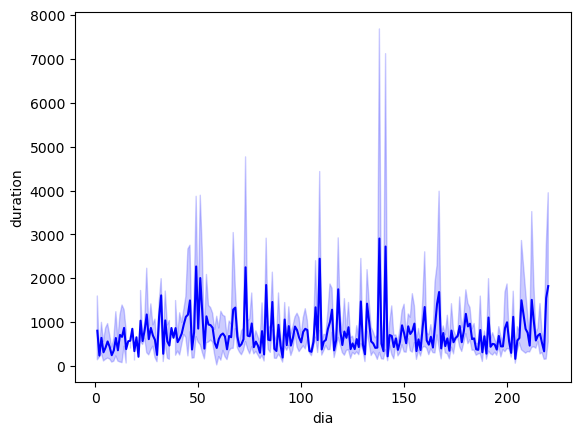

In [57]:
df_rx = df_a[(df_a['activity'] == "Meal_Preparation")].copy()
df_rx.head()
ax = sns.lineplot(x="dia", y="duration", data=df_rx, color='blue')

In [58]:
# AGRUPANDO ATIVIDADES DE CADA DIA 
# CRIANDO COLUNA DURACAO - PELA SOMA DAS DURACOES DE CADA ATIVIDADE INDIVIDUALEMENTE
dfnew = pd.DataFrame()
dfnew['duracao'] = df.groupby(['dia','week_day','is_weekend','local','activity'])['duration'].sum()
dfnew.head()

duracao
dia week_day is_weekend local activity                   
1   3        0          3     Sleeping       28459.983645
                        4     Bed_to_Toilet    158.975282
                        9     Relax           2262.216990
                        10    Relax           1578.294606
                        14    Eating           626.542263

In [59]:
# CRIANDO COLUNA FREQUENCIA - EFETUANDO A SOMA DAS OCORRENCIAS DE CADA ATIVIDADE INDIVIDUALMENTE
dfnew['frequencia'] = dfatividades.groupby(['dia','week_day','is_weekend','local','activity'])['activity'].count()
dfnew.head()

duracao  frequencia
dia week_day is_weekend local activity                               
1   3        0          3     Sleeping       28459.983645           2
                        4     Bed_to_Toilet    158.975282           1
                        9     Relax           2262.216990           3
                        10    Relax           1578.294606           2
                        14    Eating           626.542263           4

In [60]:
# CRIANDO A COLUNA DURACAO/FREQUENCIA
dfnew['duracao/frequencia'] = dfnew['duracao'] / dfnew['frequencia']
dfnew.head()

duracao  frequencia  \
dia week_day is_weekend local activity                                  
1   3        0          3     Sleeping       28459.983645           2   
                        4     Bed_to_Toilet    158.975282           1   
                        9     Relax           2262.216990           3   
                        10    Relax           1578.294606           2   
                        14    Eating           626.542263           4   

                                             duracao/frequencia  
dia week_day is_weekend local activity                           
1   3        0          3     Sleeping             14229.991823  
                        4     Bed_to_Toilet          158.975282  
                        9     Relax                  754.072330  
                        10    Relax                  789.147303  
                        14    Eating                 156.635566

In [61]:
# RESETANDO INDICE
dfnew = dfnew.reset_index()
dfnew.head()

,dia,week_day,is_weekend,local,activity,duracao,frequencia,duracao/frequencia
0,1,3,0,3,Sleeping,28459.983645,2,14229.991823
1,1,3,0,4,Bed_to_Toilet,158.975282,1,158.975282
2,1,3,0,9,Relax,2262.216990,3,754.072330
3,1,3,0,10,Relax,1578.294606,2,789.147303
4,1,3,0,14,Eating,626.542263,4,156.635566


In [62]:
# RENOMEANDO COLUNAS
dfnew.rename(columns = {'week_day':'dia_semana', 'activity':'atividade'}, inplace = True)
dfnew.head()

,dia,dia_semana,is_weekend,local,atividade,duracao,frequencia,duracao/frequencia
0,1,3,0,3,Sleeping,28459.983645,2,14229.991823
1,1,3,0,4,Bed_to_Toilet,158.975282,1,158.975282
2,1,3,0,9,Relax,2262.216990,3,754.072330
3,1,3,0,10,Relax,1578.294606,2,789.147303
4,1,3,0,14,Eating,626.542263,4,156.635566


In [63]:
dfnew.groupby('atividade')['dia'].count()

atividade
Bed_to_Toilet       133
Eating              136
Enter_Home          191
Housekeeping         31
Leave_Home          191
Meal_Preparation    247
Relax               286
Respirate             6
Sleeping            203
Wash_Dishes          53
Work                 93
Name: dia, dtype: int64

In [64]:
# AJUSTANDO TIPOS
dfnew['duracao'] = dfnew['duracao'].astype(int)  
dfnew['duracao/frequencia'] = dfnew['duracao/frequencia'].astype(int) 
dfnew['frequencia'] = dfnew['frequencia'].astype(int)  
dfnew.rename(columns = {'is_weekend':'fim_semana'}, inplace = True)
dfnew.head()

,dia,dia_semana,fim_semana,local,atividade,duracao,frequencia,duracao/frequencia
0,1,3,0,3,Sleeping,28459,2,14229
1,1,3,0,4,Bed_to_Toilet,158,1,158
2,1,3,0,9,Relax,2262,3,754
3,1,3,0,10,Relax,1578,2,789
4,1,3,0,14,Eating,626,4,156


#### Selecionando Atividades
* Meal_Preparation
* Bed_to_Toilet
* Eating
* Meal_Preparation
* Relax
* Sleeping

In [65]:
# SELECIONANDO ATIVIDADES
dfnew = dfnew[(dfnew['atividade'] == "Bed_to_Toilet") | (dfnew['atividade'] == "Eating") |
              (dfnew['atividade'] == "Meal_Preparation") | (dfnew['atividade'] == "Relax") 
            | (dfnew['atividade'] == "Sleeping")]
dfnew.head()

,dia,dia_semana,fim_semana,local,atividade,duracao,frequencia,duracao/frequencia
0,1,3,0,3,Sleeping,28459,2,14229
1,1,3,0,4,Bed_to_Toilet,158,1,158
2,1,3,0,9,Relax,2262,3,754
3,1,3,0,10,Relax,1578,2,789
4,1,3,0,14,Eating,626,4,156


In [67]:
# SALVANDO DATASET
dfnew.to_csv(r'datasetaruba/pp2/aruba_atividades_pp2.CSV', sep=';', index=False, decimal=',')